<a href="https://colab.research.google.com/github/yunjeong-chang/2022_AI_Practical_Course/blob/main/6%EC%A3%BC%EC%B0%A8_Pose_Keypoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install mediapipe opencv-python

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
from google.colab.patches import cv2_imshow
import urllib.request

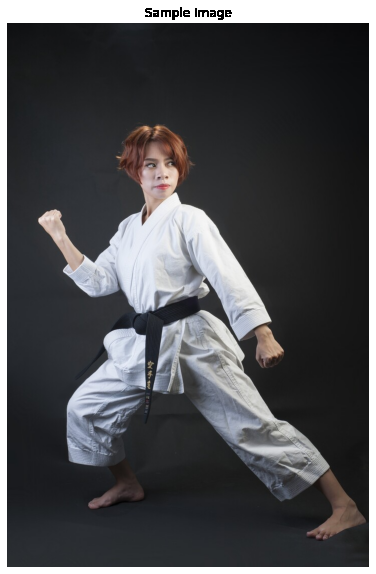

(574, 376, 3)


In [ ]:
#이미지 불러오는 함수
def url_to_image(url):
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype='uint8')
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  return image

#마우스 우클릭 후 '이미지 주소 복사'
image = url_to_image('https://bleedai.com/wp-content/uploads/2021/07/image-32.png')
cv2_imshow(image)
print(image.shape)

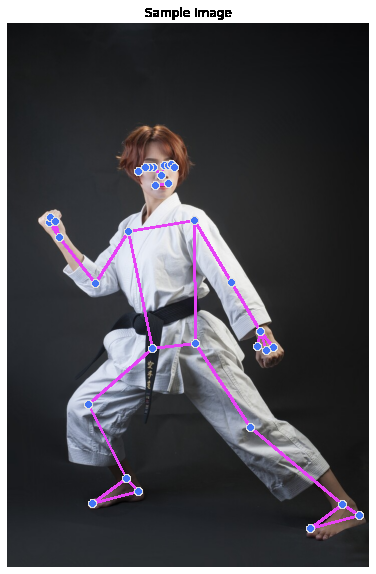

In [ ]:
#mediapie pose setting
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True,min_detection_confidence=0.5, min_tracking_confidence=0.5, model_complexity=2)

#image 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pose.process(image)
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

#keypoint drawing
mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                        mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                        mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                          ) 
cv2_imshow(image)

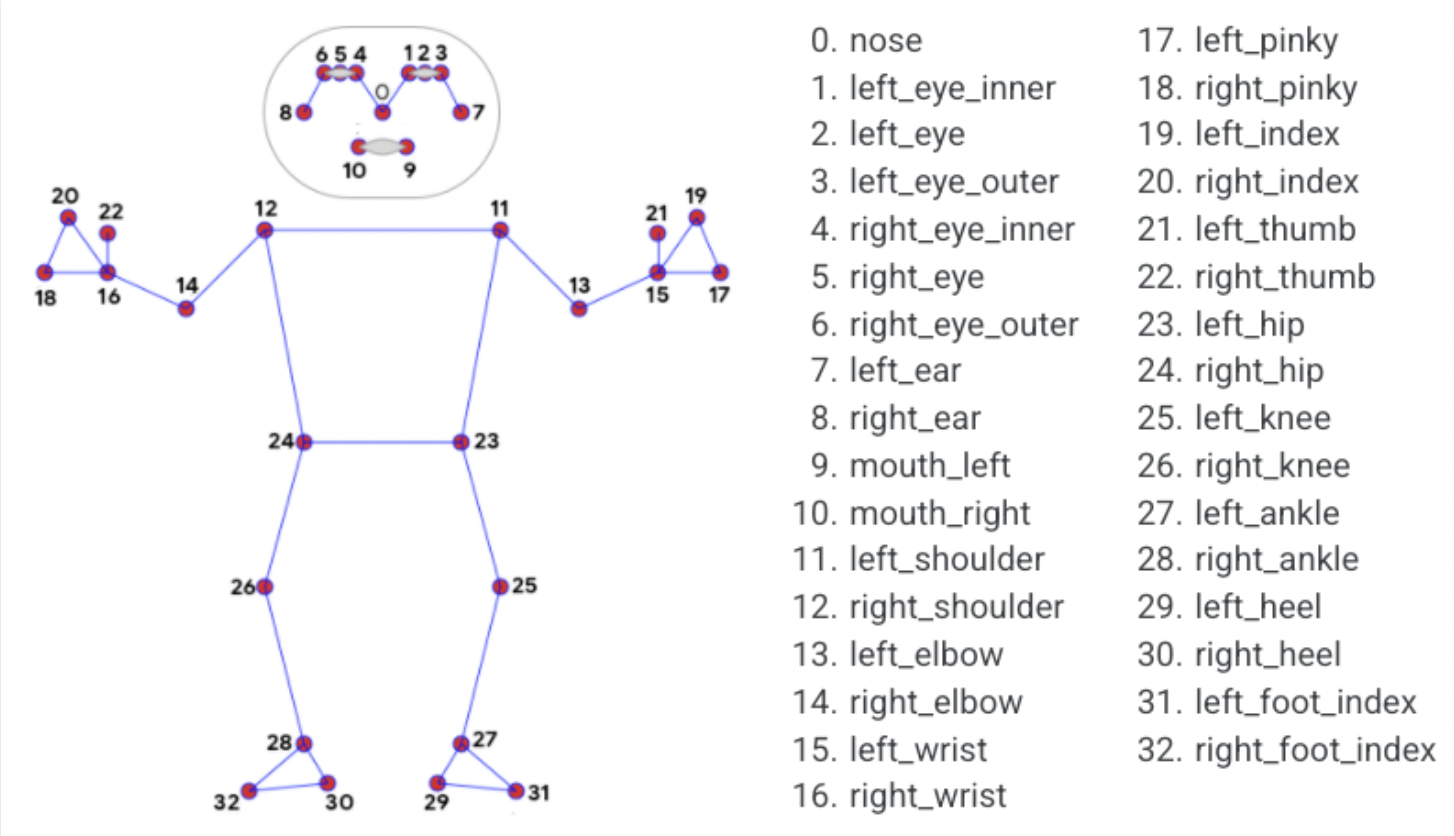

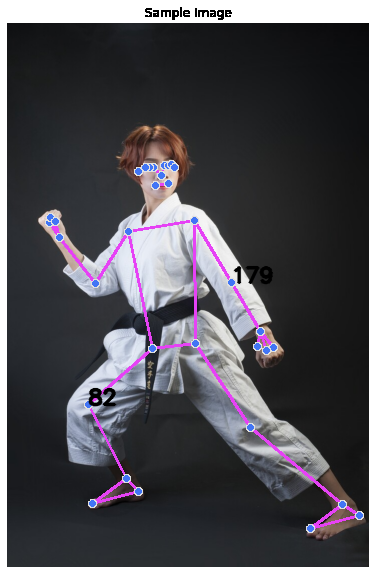

In [ ]:
#Calculate angle Method
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

#33개 keypoint 저장
landmarks = results.pose_landmarks.landmark
            
# Get coordinates
shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]

# Calculate angle
angle_elbow = calculate_angle(shoulder, elbow, wrist)
angle_knee = calculate_angle(hip, knee, ankle)

# Visualize angle
cv2.putText(image, str(round(angle_elbow)),tuple(np.multiply(elbow, [376, 574]).astype(int)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2, cv2.LINE_AA)
cv2.putText(image, str(round(angle_knee)),tuple(np.multiply(knee, [376, 574]).astype(int)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2, cv2.LINE_AA)

cv2_imshow(image)

1. 다른 사진을 불러와서 원하는 부분 keypoint 검출 후 각도 측정 해 보기
2. 위와 같은 방식으로 요가 및 홈 트레이닝 자세 교정 프로그램 만들 수 있음